<h1 align="center">Теоретическая часть</h1> 

**Вопрос 1.** Напишите уравнение временного ряда (в виде $y_{t} = f \left(y_{t-1}, \ldots, y_{1}, ~\varepsilon_{t}, \ldots, \varepsilon_{1} \right)$), которое соответствует модели:
 * $ARIMA\ (p = 1,\ d = k,\ q = 0)$
   - **Ответ:**
     Введем следующий дифференциальный оператор $(AR(1))$:
     $$\Phi_{1}(B) = 1 - \phi_{1} B$$
     Так как $d = k$, то мы будем работать с дифференциальным оператором другого вида:
     $$\Phi(B) = (1 - B)^{k} \Phi_{1}(B) = (1 - B)^{k} (1 - \phi_{1} B)$$
     Тогда модель можно записать следующим образом:
     $$\Phi(B)(y_{t} - \mu) = \varepsilon_{t}$$
     где $\mu$ - среднее временного ряда. Применим дифференциальный оператор и оставим слева только $y_{t}$:
     $$(1 - \phi_{1} B)\left[\sum_{i=0}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) = \varepsilon_{t}$$
     $$(1 - \phi_{1} B)\left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) = \varepsilon_{t}$$
     $$\left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) - \phi_{1} B \left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) = \varepsilon_{t}$$
     $$(y_{t} - \mu) + \left[\sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) - \phi_{1} B \left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) = \varepsilon_{t}$$
     $$y_{t} = \mu - \left[\sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) + \phi_{1} B \left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) + \varepsilon_{t}$$
     
 * $ARIMA\ (p = 1,\ d = k+1,\ d = 0)(P = 0,\ D = 1,\ Q = 1)_s$
   - **Ответ:**
     Аналогично предыдущему запишем модель с помощью дифференциальных операторов:
     $$(1 - \phi_{1} B)(1 - B^{s})(1 - B)^{k+1}(y_{t} - \mu) = (1 + \theta_{1} B^{s})\varepsilon_{t}$$
     $$(1 - B^{s})(1 - B)^{k+1}(y_{t} - \mu) = \phi_{1} B (1 - B^{s})(1 - B)^{k+1}(y_{t} - \mu) + (1 + \theta_{1} B^{s})\varepsilon_{t}$$
     $$(1 - B)^{k+1}(y_{t} - \mu) = B^{s}(1 - B)^{k+1}(y_{t} - \mu) + \phi_{1} B (1 - B^{s})(1 - B)^{k+1}(y_{t} - \mu) + (1 + \theta_{1} B^{s})\varepsilon_{t}$$
     $$\left[1 + \sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) = B^{s}(1 - B)^{k+1}(y_{t} - \mu) + \phi_{1} B (1 - B^{s})(1 - B)^{k+1}(y_{t} - \mu) + (1 + \theta_{1} B^{s})\varepsilon_{t}$$
     $$y_{t} = \mu - \left[\sum_{i=1}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) + B^{s}\left[\sum_{i=0}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) + \phi_{1} B (1 - B^{s})\left[\sum_{i=0}^{k}\binom{k}{i}(-B)^{i}\right](y_{t} - \mu) + (1 + \theta_{1} B^{s})\varepsilon_{t}$$

*В обоих случаях я не стал раскрывать скобки - выражения станут очень длинными и сложными; интересная часть заключалась в выписывании модели, а не взятии большого числа производных.*

---

**Вопрос 2.**
  * Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.
    - **Ответ:**
      Представим ситуацию, что у нас есть два алгоритма, предсказывающих временной ряд. Допустим, что временной ряд есть константа 0, первый алгоритм предсказывает только 0, второй - только 1. Тогда при подсчете весов `Adaptive Composition` произойдет следующее: правильный алгоритм получит вес 0 (так как он не ошибается, то его ошибка в каждый момент времени равна нулю), а неравильный - 1 (потому что веса в сумме дают единицу). В итоге `Adaptive Composition` будет предсказывать хуже, чем лучший из базовых алгоритмов: 1 против 0.
  * Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.
    - **Ответ:**
      Представим ситуацию, что у нас есть 101 алгоритм, предсказывающий временной ряд. Допустим, что весь временной ряд - константа **_B_** и выполняется следующее:
        - 100 алгоритмов предсказывают значение $B + \frac{\varepsilon}{2}$
        - 1 алгоритм предсказывает значение $B$
        
      Тогда `Adaptive Selection` будет давать прогноз хуже, чем лучший из базовых алгоритмов: $B + \frac{50 \varepsilon}{101}$ против $B$.

---

**Вопрос 3.** Покажите, что $ARIMA\ (p = 1,\ d = 2,\ q = 2)$ эквивалентна модели ЭС с линейным затухающим трендом (damped-trend linear exponential smoothing ) при условиях:

$$(1 - \phi B)(1 - B) y_{t} = (1 - \theta_{1} B - \theta_{2} B^{2}) \epsilon_{t}$$
$$\theta_{1} = 1 + \phi - \alpha - \alpha \beta \phi,\ \theta_{2} = (\alpha - 1) \phi$$

$\phi$ - coefficient of damped trend.

**Ответ:**
Сначала просто раскроем скобки и применим дифференциальные операторы:
$$(1 - B) y_{t} - \phi B (1 - B) y_{t} = (1 - \theta_{1} B - \theta_{2} B^{2}) \varepsilon_{t}$$
$$y_{t} - y_{t-1} - \phi B (y_{t} - y_{t-1}) = \varepsilon_{t} - \theta_{1} \varepsilon_{t-1} - \theta_{2} \varepsilon_{t-2}$$
$$y_{t} - y_{t-1} - \phi (y_{t-1} - y_{t-2}) = \varepsilon_{t} - (1 + \phi - \alpha - \alpha \beta \phi) \varepsilon_{t-1} - \phi (\alpha - 1) \varepsilon_{t-2}$$
Воспользуемся формулой $\varepsilon_{t} = y_{t} - \widehat{y}_{t}$
$$\phi y_{t-2} = -\widehat{y}_{t} + \alpha y_{t-1} + \alpha \beta \phi y_{t-1} + (1 + \phi - \alpha - \alpha \beta \phi) \widehat{y}_{t-1} - \phi (\alpha - 1) (y_{t-2} - \widehat{y}_{t-2})$$
$$\widehat{y}_{t} = \alpha y_{t-1} + (1 - \alpha) \widehat{y}_{t-1} + \alpha \beta \phi y_{t-1} + (\phi - \alpha \beta \phi) \widehat{y}_{t-1} + \phi (\alpha - 1) \widehat{y}_{t-2} - \phi \alpha y_{t-2}$$
Для модели ЭС мы знаем следующее:
$$\widehat{y}_{t} = l_{t-1} + \phi b_{t-1}$$
$$l_{t} = \alpha y_{t} + (1 - \alpha)(l_{t-1} + \phi b_{t-1}) = \alpha y_{t} + (1 - \alpha) \widehat{y}_{t}$$
$$b_{t} = \beta (l_{t} - l_{t-1}) + (1 - \beta) \phi b_{t-1}$$
Соберем все вместе:
$$\widehat{y}_{t} = l_{t-1} + \phi \left[\alpha \beta y_{t-1} + (1 - \alpha \beta) \widehat{y}_{t-1} + (\alpha - 1) \widehat{y}_{t-2} - \alpha y_{t-2}\right]$$
$$\widehat{y}_{t} = l_{t-1} + \phi \left[\beta\left(\alpha y_{t-1} + (1 - \alpha) \widehat{y}_{t-1} \right) + \left(1 - \alpha \beta \right) \widehat{y}_{t-1} - \left(1 - \alpha\right) \beta \widehat{y}_{t-1} - l_{t-2} \right]$$
$$\widehat{y}_{t} = l_{t-1} + \phi \left[\beta l_{t-1} + \widehat{y}_{t-1} - \beta \widehat{y}_{t-1} - l_{t-2} \right]$$
$$\widehat{y}_{t} = l_{t-1} + \phi \left[\beta l_{t-1} + \phi b_{t-2} - \beta (l_{t-2} + \phi b_{t-2}) \right]$$
$$\widehat{y}_{t} = l_{t-1} + \phi \left[\beta (l_{t-1} - l_{t-2}) + (1 - \beta) \phi b_{t-2} \right]$$
$$\widehat{y}_{t} = l_{t-1} + \phi b_{t-1}$$
$$\blacksquare$$

<h1 align="center">Практическая часть I</h1>

Требуется проанализировать временной ряд и спрогнозировать его моделю ARIMA. 

In [1]:
import warnings
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa import stattools
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# In this task warnings occur constantly.
# I usually read them when doing the task
# and supress them later, so the code
# and, most importantly, output looks nice.
warnings.simplefilter('ignore')

#### Read data for TS under consideration and use the first 80% of all length of the TS as train TS

In [3]:
df = pd.read_csv('data.csv', parse_dates=True, index_col='Month')
df.index.names = ['Timestamp'] 
columns = {
    'Civilian labour force in Australia each month: thousands of persons. Feb 1978 ? Aug 1995': 'value',
}
df = df.rename(index=str, columns=columns)

In [4]:
train_df = df[:int(len(df) * 0.8)]

#### Plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)

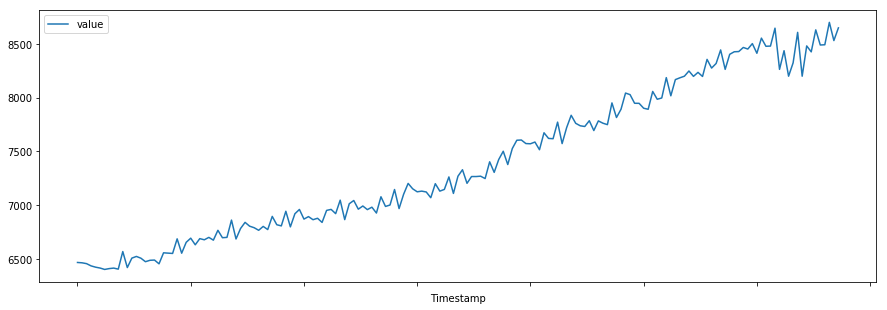

In [5]:
train_df.plot(figsize=(15, 5))

Видим, что конец `train_df` содержит данные, выбивающиеся относительно остальных. Давайте их удалим. Сделаем так, чтобы датасет начинался в Январе, и кончался в Декабре.

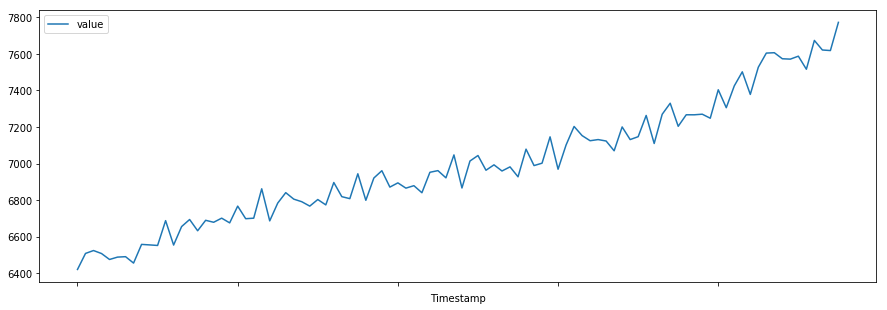

In [6]:
train_df_cut = train_df[11:107]
train_df_cut.plot(figsize=(15, 5))

#### Stabilize dispersion of the train TS through box-cox transformation if needed

Кажется, что диспресия не сильно меняется со временем.

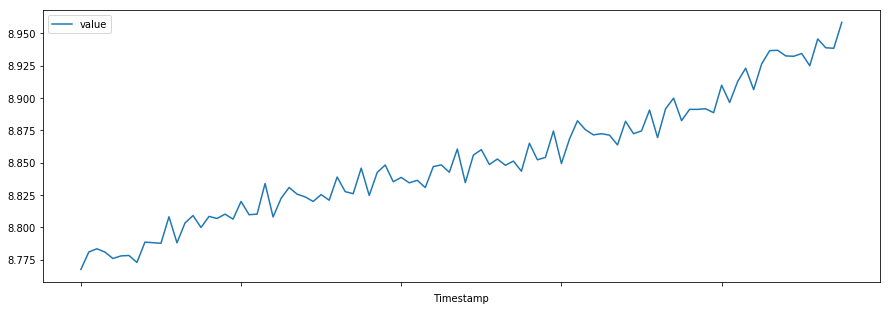

In [7]:
train_df_boxcox = train_df_cut.copy()
train_df_boxcox = np.log(train_df_boxcox)
train_df_boxcox.plot(figsize=(15, 5))

#### If the transformed train TS is non-stationary make it stationary (remember the power of differencing $d$)

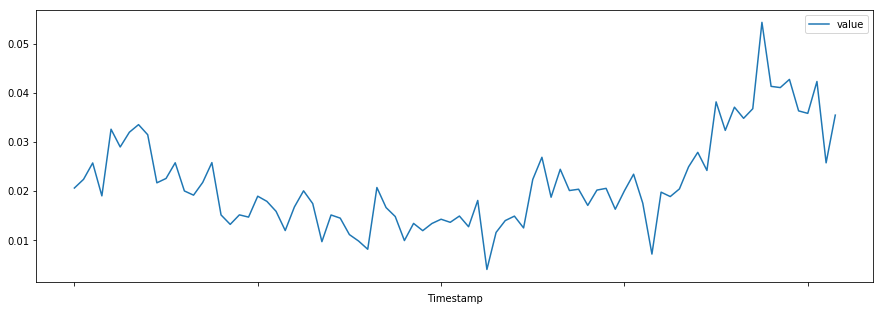

In [8]:
d1_train_df_boxcox = (train_df_boxcox - train_df_boxcox.shift(12))[12:]
d1_train_df_boxcox.plot(figsize=(15, 5))

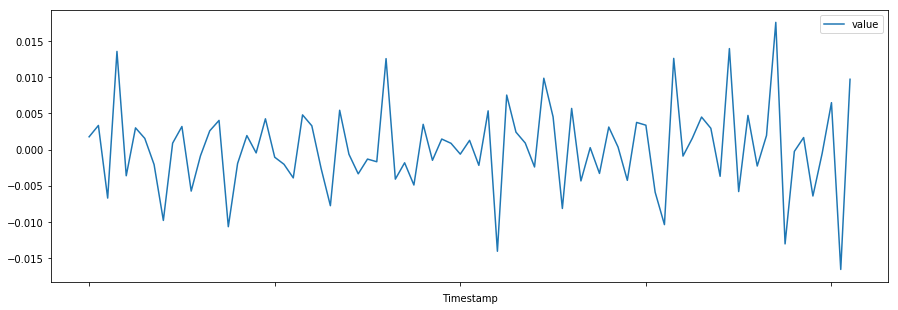

In [9]:
d2_train_df_boxcox = (d1_train_df_boxcox - d1_train_df_boxcox.shift(1))[1:]
d2_train_df_boxcox.plot(figsize=(15, 5))

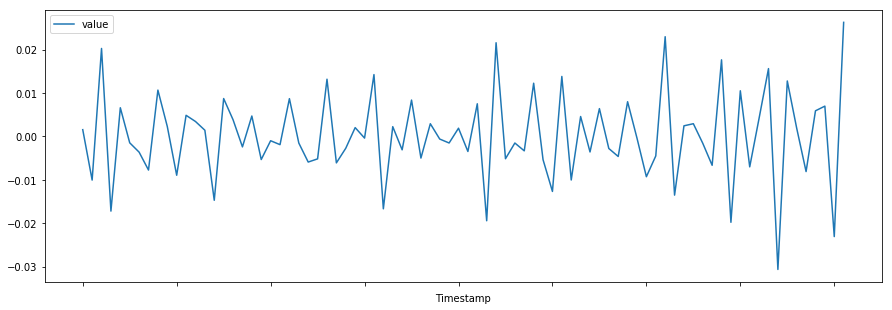

In [10]:
d3_train_df_boxcox = (d2_train_df_boxcox - d2_train_df_boxcox.shift(1))[1:]
d3_train_df_boxcox.plot(figsize=(15, 5))

In [11]:
kpss_stat = stattools.kpss(d3_train_df_boxcox.value)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.147274, 
pvalue: 0.10 
maximal Lag: 12 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Как видим, теперь временной ряд стационарен.

#### Plot ACF/PACF for  the transformed train TS in order to understand whether $AR(p)/MA(q)$ may be used

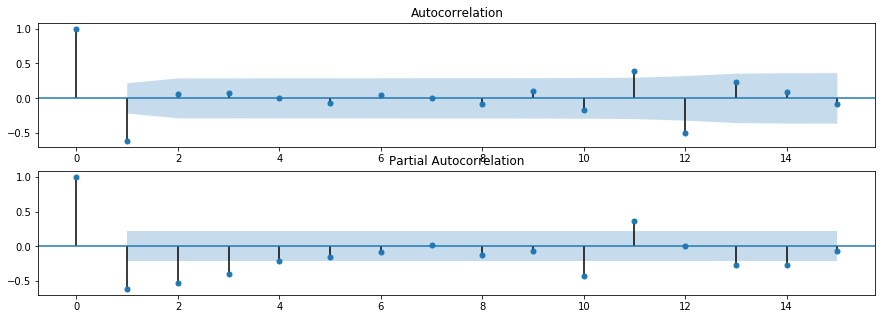

In [12]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d3_train_df_boxcox, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d3_train_df_boxcox, lags=15, ax=ax2)

#### Select set of candidate parameters for ARMA (for the train TS)

* candidates values for q (according to ACF) - 1, 11
* candidates values for p (according to PACF) - 1, 2, 3, 4, 10, 11

#### Train candidate ARIMA models (use $d$ from step 3, $p$, $q$ from step 5), compare their AIC, choose the best model

In [13]:
try:
    arima_mod121 = sm.tsa.ARIMA(d1_train_df_boxcox, (1,2,1)).fit()
    print(arima_mod121.params)
    print(arima_mod121.aic, arima_mod121.bic, arima_mod121.hqic)
except Exception:
    print('Problem occured')

const             0.000009
ar.L1.D2.value   -0.423946
ma.L1.D2.value   -0.999890
dtype: float64
-605.5911094373123 -595.9642324482553 -601.7260656153828


In [14]:
try:
    arima_mod221 = sm.tsa.ARIMA(d1_train_df_boxcox, (2,2,1)).fit()
    print(arima_mod221.params)
    print(arima_mod221.aic, arima_mod221.bic, arima_mod221.hqic)
except Exception:
    print('Problem occured')

const             0.000010
ar.L1.D2.value   -0.536683
ar.L2.D2.value   -0.276132
ma.L1.D2.value   -0.972684
dtype: float64
-609.0653091585747 -597.0317129222534 -604.2340043811628


In [15]:
try:
    arima_mod321 = sm.tsa.ARIMA(d1_train_df_boxcox, (3,2,1)).fit()
    print(arima_mod321.params)
    print(arima_mod321.aic, arima_mod321.bic, arima_mod321.hqic)
except Exception:
    print('Problem occured')

const             0.000011
ar.L1.D2.value   -0.544895
ar.L2.D2.value   -0.297363
ar.L3.D2.value   -0.037799
ma.L1.D2.value   -0.999990
dtype: float64
-607.6632581549844 -593.2229426713989 -601.8656924220902


In [16]:
try:
    arima_mod421 = sm.tsa.ARIMA(d1_train_df_boxcox, (4,2,1)).fit()
    print(arima_mod421.params)
    print(arima_mod421.aic, arima_mod421.bic, arima_mod421.hqic)
except Exception:
    print('Problem occured')

const             0.000010
ar.L1.D2.value   -0.543942
ar.L2.D2.value   -0.282486
ar.L3.D2.value    0.014400
ar.L4.D2.value    0.073329
ma.L1.D2.value   -0.999997
dtype: float64
-605.8840596241309 -589.0370248932811 -599.1202329357543


In [17]:
try:
    arima_mod1021 = sm.tsa.ARIMA(d1_train_df_boxcox, (10,2,1)).fit()
    print(arima_mod1021.params)
    print(arima_mod1021.aic, arima_mod1021.bic, arima_mod1021.hqic)
except Exception:
    print('Problem occured')

Problem occured


In [18]:
try:
    arima_mod1121 = sm.tsa.ARIMA(d1_train_df_boxcox, (11,2,1)).fit()
    print(arima_mod1121.params)
    print(arima_mod1121.aic, arima_mod1121.bic, arima_mod1121.hqic)
except Exception:
    print('Problem occured')

Problem occured


In [19]:
try:
    arima_mod1211 = sm.tsa.ARIMA(d1_train_df_boxcox, (1,2,11)).fit()
    print(arima_mod1211.params)
    print(arima_mod1211.aic, arima_mod1211.bic, arima_mod1211.hqic)
except Exception:
    print('Problem occured')

Problem occured


In [20]:
try:
    arima_mod2211 = sm.tsa.ARIMA(d1_train_df_boxcox, (2,2,11)).fit()
    print(arima_mod2211.params)
    print(arima_mod2211.aic, arima_mod2211.bic, arima_mod2211.hqic)
except Exception:
    print('Problem occured')

const             -0.000011
ar.L1.D2.value    -1.263743
ar.L2.D2.value    -0.550731
ma.L1.D2.value    -0.150381
ma.L2.D2.value    -0.807132
ma.L3.D2.value     0.016929
ma.L4.D2.value     0.585967
ma.L5.D2.value    -0.108554
ma.L6.D2.value    -0.610237
ma.L7.D2.value     0.059906
ma.L8.D2.value     0.800382
ma.L9.D2.value    -0.008853
ma.L10.D2.value   -0.859725
ma.L11.D2.value    0.088592
dtype: float64
-610.1341853992785 -574.0333966903147 -595.6402710670429


In [21]:
try:
    arima_mod3211 = sm.tsa.ARIMA(d1_train_df_boxcox, (3,2,11)).fit()
    print(arima_mod3211.params)
    print(arima_mod3211.aic, arima_mod3211.bic, arima_mod3211.hqic)
except Exception:
    print('Problem occured')

const              0.000022
ar.L1.D2.value    -1.476317
ar.L2.D2.value    -1.410723
ar.L3.D2.value    -0.836220
ma.L1.D2.value     0.140185
ma.L2.D2.value    -0.110227
ma.L3.D2.value    -0.674863
ma.L4.D2.value    -0.860918
ma.L5.D2.value     0.195528
ma.L6.D2.value     0.055295
ma.L7.D2.value     0.075883
ma.L8.D2.value    -0.186077
ma.L9.D2.value    -0.215370
ma.L10.D2.value    0.131830
ma.L11.D2.value    0.505578
dtype: float64
-606.0602227189465 -567.5527147627184 -590.6000474312286


In [22]:
try:
    arima_mod4211 = sm.tsa.ARIMA(d1_train_df_boxcox, (4,2,11)).fit()
    print(arima_mod4211.params)
    print(arima_mod4211.aic, arima_mod4211.bic, arima_mod4211.hqic)
except Exception:
    print('Problem occured')

const              0.000023
ar.L1.D2.value    -1.958733
ar.L2.D2.value    -2.204974
ar.L3.D2.value    -1.595153
ar.L4.D2.value    -0.568052
ma.L1.D2.value     0.652430
ma.L2.D2.value     0.043670
ma.L3.D2.value    -0.704414
ma.L4.D2.value    -1.010169
ma.L5.D2.value    -0.376936
ma.L6.D2.value     0.019745
ma.L7.D2.value    -0.143631
ma.L8.D2.value    -0.163987
ma.L9.D2.value    -0.046738
ma.L10.D2.value    0.195302
ma.L11.D2.value    0.694306
dtype: float64
-614.1673306729568 -573.2531034694646 -597.7408944297565


In [23]:
try:
    arima_mod10211 = sm.tsa.ARIMA(d1_train_df_boxcox, (10,2,11)).fit()
    print(arima_mod10211.params)
    print(arima_mod10211.aic, arima_mod10211.bic, arima_mod10211.hqic)
except Exception:
    print('Problem occured')

Problem occured


In [24]:
try:
    arima_mod11211 = sm.tsa.ARIMA(d1_train_df_boxcox, (11,2,11)).fit()
    print(arima_mod11211.params)
    print(arima_mod11211.aic, arima_mod11211.bic, arima_mod11211.hqic)
except Exception:
    print('Problem occured')

Problem occured


Лучшая модель: `arima_mod4211`

#### Check test for unbiasedness, stationarity and non-autocorrelation of the residuals of the best ARIMA model; if the tests fail you need to review your choice

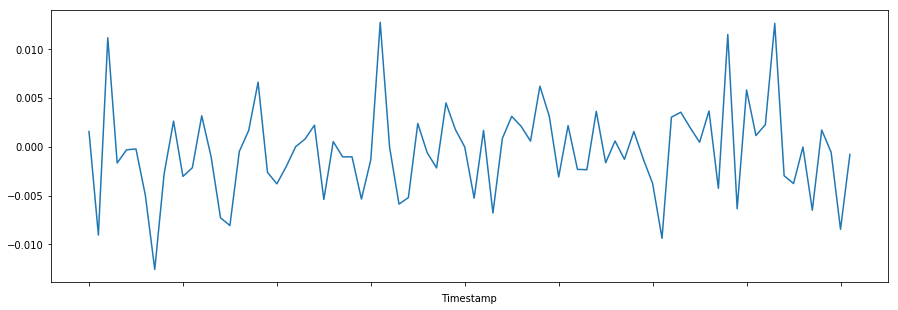

In [25]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax = arima_mod4211.resid.plot(ax=ax, figsize=(15, 5));

In [26]:
# Stationarity test
kpss_stat= stattools.kpss(arima_mod4211.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.261385, 
pvalue: 0.10 
maximal Lag: 12 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Гипотеза о стационарности не отергается.

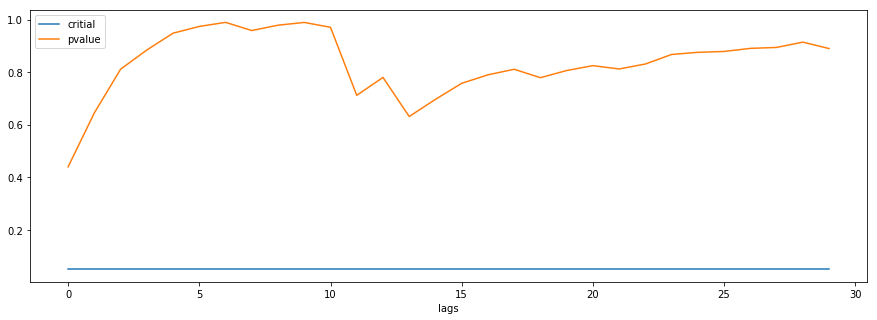

In [27]:
# Autocorrelation test
pd.DataFrame({'lags':range(30),
              'pvalue':sm.stats.diagnostic.acorr_ljungbox(arima_mod4211.resid.values, lags=30)[1], 
              'critial':np.array([0.05]*30)}).set_index('lags').plot(figsize=(15,5))

Значения временного ряда не скоррелированы.

In [28]:
# Unbiasedness test
sm.stats.durbin_watson(arima_mod4211.resid.values)

2.145569017812668

In [29]:
# Unbiasedness test
stat = stats.wilcoxon(arima_mod4211.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 1464.000000
pvalue: 0.27


Гипотеза об `unbiasedness` не отвергается.

In [30]:
# Normality test
stats.normaltest(arima_mod4211.resid)

NormaltestResult(statistic=5.715222476083085, pvalue=0.057405725224610626)

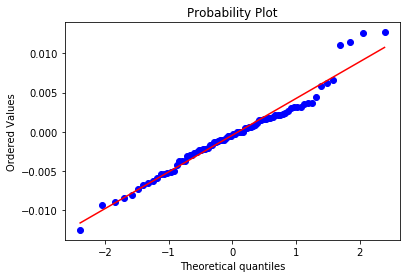

In [31]:
# q-qPlot
fig = plt.figure()
res = stats.probplot(arima_mod4211.resid, dist='norm', plot=plt)

Гипотеза о нормальности не отвергается (тут совсем немного больше `0.05`, но я думаю, что пойдет).

---

Все тесты успешно пройдены.

#### Build forecast for the initial TS (you need to transform it like in step 2)

In [32]:
df_copy = df.copy()
df_copy = np.log(df_copy)
df_copy = df_copy.dropna()
df_copy = (df_copy - df_copy.shift(12))[12:]

In [33]:
_arima_mod4211 = sm.tsa.ARIMA(df_copy, (4,2,11)).fit()

#### Build forecast interval for the last 20% of the transformed initial TS. Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

In [34]:
preds = _arima_mod4211.predict()
print(len(preds))

197


20% `preds` - это 39 элементов. Сделаем для 36 (потому что это ровно 3 года).

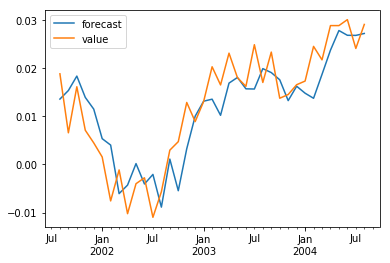

In [35]:
_ = _arima_mod4211.plot_predict(start='2001-08-01', end='2004-08-01')

In [36]:
def MACAPE(x, y):
    qlt = (2 * abs(x - y) / (x + y))
    return qlt.mean()

In [37]:
# Retrieve value and forecast from the plot
ax = _.gca()
line1 = ax.lines[0]
line2 = ax.lines[1]
frc = line1.get_ydata()
value = line2.get_ydata()

In [38]:
MACAPE(frc, value)

-0.8133687074758678

В принципе прогноз передает основную суть, но мог бы быть и получше.

<h1 align="center">Практическая часть II</h1>

Мы будем решать достаточно классическую задачу классификации движений на основе [данных](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) из репозитория UCI ([прямая ссылка на скачивание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip)). Данные представляют собой сигналы с гироскопа и акселерометра, закрепленного на теле человека. Каждому семплу соотвествует 9 связанных временных рядов.

В начале приведена визуализация данных на основе PCA над вручную сгенерированными признаками. Для отрисовки графиков (цвет и легенда) нам также понадобятся метки классов.

In [3]:
import os
import pylab

In [4]:
X_train_with_engineered_features = np.genfromtxt(os.path.join("UCI HAR Dataset", "train", "X_train.txt"))
y_train = np.genfromtxt(os.path.join("UCI HAR Dataset", "train", "y_train.txt"))

In [5]:
y_train_list = list(y_train)
X_unique = np.array([X_train_with_engineered_features[y_train_list.index(l)]
                             for l in sorted(list(set(y_train)))])

In [6]:
legend_labels = ["WALKING", "WALKING.UP", "WALKING.DOWN", "SITTING", "STANDING", "LAYING"]
colors_list = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta']
mapped_colors = [colors_list[int(i)-1] for i in y_train]

In [7]:
from sklearn.decomposition import PCA
pca = PCA()

In [8]:
X_train_pca = pca.fit_transform(X_train_with_engineered_features)

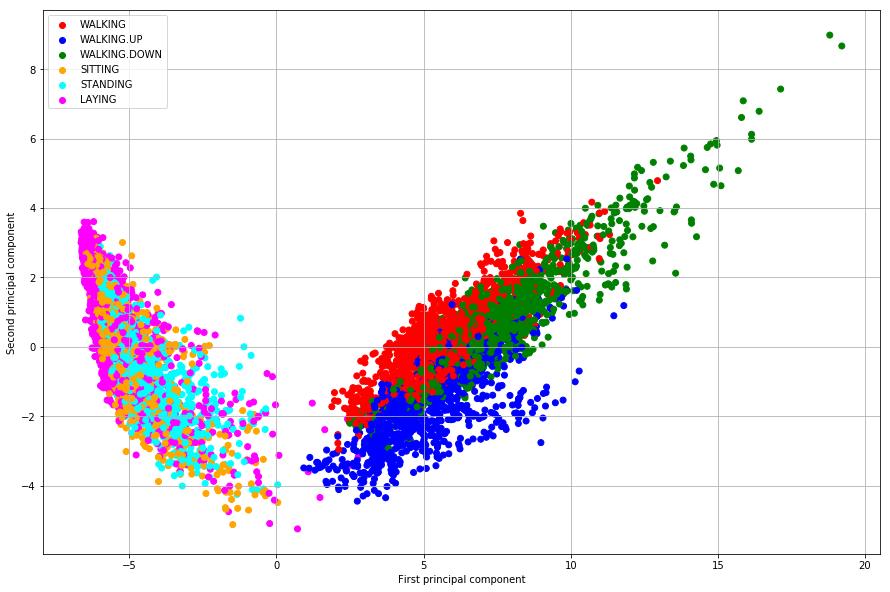

In [9]:
plt.figure(figsize=(15,10))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
             c=mapped_colors)
plt.grid()
for idx, x in enumerate(pca.transform(X_unique)):
    plt.scatter(x[0], 
                x[1], 
                c=colors_list[idx], 
                label=legend_labels[idx])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()

### Часть 0. Разогрев

Данное задание составлено на основе данного [поста](https://burakhimmetoglu.com/2017/08/22/time-series-classification-with-tensorflow/). С помощью вручную сгенерированных фичей и классических подходов задача распознования движений была решена с точностью 96%. 

Также будет полезным изучить [вот этот](https://github.com/healthDataScience/deep-learning-HAR), а так же [вот этот репозиторий](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition), где к данной задаче рассматривается несколько подходов.

### Часть 1. Предобработка данных

Предобработка сделана за нас автором [данного репозитория](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition).

In [10]:
os.path.join('data', 'etc', 'file1.asdas')

'data/etc/file1.asdas'

In [11]:
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
]

DATA_PATH = "./"

DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"
print("\n" + "Dataset is now located at: " + DATASET_PATH)

TRAIN = "train/"
TEST = "test/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    os.path.join(*[DATASET_PATH, TRAIN, "Inertial Signals/", signal+"train.txt"]) for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    os.path.join(*[DATASET_PATH, TEST, "Inertial Signals/", signal+"test.txt"]) for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = os.path.join(DATASET_PATH, TRAIN, "y_train.txt")
y_test_path = os.path.join(DATASET_PATH, TEST, "y_test.txt")

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)


Dataset is now located at: ./UCI HAR Dataset/


In [12]:
# Input Data 

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = len(X_train[0])  # 128 timesteps per series
n_input = len(X_train[0][0])  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 6 # Total classes (should go up, or should go down)


# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")

Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) 0.09913992 0.39567086
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


### Часть 2. Построение сети и эксперименты

Ваша задача - построить сеть, которая решит задачу классификации с точностью (`accuracy`) не менее 80%.

Базовая модель построена с использованием библиотеки `keras` для вас. Вы можете использовать любой знакомый вам фреймворк. Удачи в экспериментах. 

__Bonus__: при достижении 85% accuracy - 25% бонусных баллов, при достижении 89% accuracy - 50% бонусных баллов (т.е. ещё 25%).

In [13]:
import keras

Using TensorFlow backend.


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, SimpleRNN, Reshape
from keras.utils import to_categorical
from keras import regularizers

from sklearn.metrics import accuracy_score

In [15]:
model = Sequential()
model.add(LSTM(units=16, activation='relu',
               input_shape=(128, 9)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Метки классов стоит перевести в one-hot-encoded формат (теперь это векторы вероятностей принадлежности классу). 

In [16]:
def one_hot_encode(y, n_classes):
    return to_categorical(y, n_classes)

In [17]:
y_train_one_hot = one_hot_encode(y_train, 6)
y_test_one_hot = one_hot_encode(y_test, 6)

In [18]:
model.fit(X_train, y_train_one_hot, batch_size=128, epochs=20)

Epoch 1/20
7352/7352 [==============================] - 6s 829us/step - loss: 1.7218 - acc: 0.2920
Epoch 2/20
7352/7352 [==============================] - 5s 716us/step - loss: 1.5760 - acc: 0.4474
Epoch 3/20
7352/7352 [==============================] - 5s 722us/step - loss: 1.4944 - acc: 0.5680
Epoch 4/20
7352/7352 [==============================] - 5s 703us/step - loss: 1.4583 - acc: 0.5692
Epoch 5/20
7352/7352 [==============================] - 5s 724us/step - loss: 1.4349 - acc: 0.5815
Epoch 6/20
7352/7352 [==============================] - 5s 720us/step - loss: 1.4064 - acc: 0.5820
Epoch 7/20
7352/7352 [==============================] - 5s 701us/step - loss: 1.3795 - acc: 0.5856
Epoch 8/20
7352/7352 [==============================] - 5s 714us/step - loss: 1.3543 - acc: 0.5899
Epoch 9/20
7352/7352 [==============================] - 5s 719us/step - loss: 1.3302 - acc: 0.5902
Epoch 10/20
7352/7352 [==============================] - 5s 717us/step - loss: 1.3067 - acc: 0.5906
Epoch 11/

In [20]:
accuracy_score(y_test, model.predict_classes(X_test))

0.5429250084832032

---

In [71]:
model = Sequential()
model.add(LSTM(32, input_shape=(128, 9)))
model.add(Dense(6, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train_one_hot, batch_size=64, epochs=20)

Epoch 1/20
7352/7352 [==============================] - 13s 2ms/step - loss: 3.9844 - acc: 0.4034
Epoch 2/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.7421 - acc: 0.5042
Epoch 3/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.6248 - acc: 0.5582
Epoch 4/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.7437 - acc: 0.5419
Epoch 5/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.5143 - acc: 0.5558
Epoch 6/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.7295 - acc: 0.5673
Epoch 7/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.4362 - acc: 0.6174
Epoch 8/20
7352/7352 [==============================] - 11s 1ms/step - loss: 3.3604 - acc: 0.6372
Epoch 9/20
7352/7352 [==============================] - 11s 1ms/step - loss: 0.9048 - acc: 0.6672
Epoch 10/20
7352/7352 [==============================] - 11s 1ms/step - loss: nan - acc: 0.2179
Epoch 11/20
7352/7352 

In [73]:
accuracy_score(y_test, model.predict_classes(X_test))

0.168306752629793

---

In [68]:
model = Sequential()
model.add(LSTM(32, input_shape=(128, 9)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train_one_hot, batch_size=128, epochs=20)

Epoch 1/20
7352/7352 [==============================] - 7s 976us/step - loss: nan - acc: 0.1673
Epoch 2/20
7352/7352 [==============================] - 6s 877us/step - loss: nan - acc: 0.1668
Epoch 3/20
7352/7352 [==============================] - 6s 795us/step - loss: nan - acc: 0.1668
Epoch 4/20
7352/7352 [==============================] - 6s 800us/step - loss: nan - acc: 0.1668
Epoch 5/20
7352/7352 [==============================] - 6s 783us/step - loss: nan - acc: 0.1668
Epoch 6/20
7352/7352 [==============================] - 5s 742us/step - loss: nan - acc: 0.1668
Epoch 7/20
7352/7352 [==============================] - 6s 752us/step - loss: nan - acc: 0.1668
Epoch 8/20
7352/7352 [==============================] - 6s 748us/step - loss: nan - acc: 0.1668
Epoch 9/20
7352/7352 [==============================] - 6s 760us/step - loss: nan - acc: 0.1668
Epoch 10/20
7352/7352 [==============================] - 6s 782us/step - loss: nan - acc: 0.1668
Epoch 11/20
7352/7352 [================

In [70]:
accuracy_score(y_test, model.predict_classes(X_test))

0.168306752629793

---

In [59]:
model = Sequential()
model.add(LSTM(32, input_shape=(128, 9)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train_one_hot, batch_size=16, epochs=20)

Epoch 1/20
7352/7352 [==============================] - 44s 6ms/step - loss: 1.3457 - acc: 0.4355
Epoch 2/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.9732 - acc: 0.5808
Epoch 3/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.8052 - acc: 0.6319
Epoch 4/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.7530 - acc: 0.6394
Epoch 5/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.7126 - acc: 0.6542
Epoch 6/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.6413 - acc: 0.6893
Epoch 7/20
7352/7352 [==============================] - 41s 6ms/step - loss: 0.5800 - acc: 0.7456
Epoch 8/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.5230 - acc: 0.8073
Epoch 9/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.4765 - acc: 0.8441
Epoch 10/20
7352/7352 [==============================] - 42s 6ms/step - loss: 0.4023 - acc: 0.8863
Epoch 11/20
7352/73

In [61]:
accuracy_score(y_test, model.predict_classes(X_test))

0.8700373260943333

---

In [62]:
model = Sequential()
model.add(LSTM(32, input_shape=(128, 9)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train_one_hot, batch_size=16, epochs=30)

Epoch 1/30
7352/7352 [==============================] - 44s 6ms/step - loss: 1.3535 - acc: 0.4034
Epoch 2/30
7352/7352 [==============================] - 42s 6ms/step - loss: 1.0920 - acc: 0.4894
Epoch 3/30
7352/7352 [==============================] - 42s 6ms/step - loss: 1.0479 - acc: 0.5049
Epoch 4/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.8623 - acc: 0.6104
Epoch 5/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.7606 - acc: 0.6655
Epoch 6/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.7022 - acc: 0.6640
Epoch 7/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.6797 - acc: 0.6707
Epoch 8/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.6236 - acc: 0.6878
Epoch 9/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.5854 - acc: 0.6997
Epoch 10/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.5797 - acc: 0.7144
Epoch 11/30
7352/73

In [64]:
accuracy_score(y_test, model.predict_classes(X_test))

0.9073634204275535

## Отчет

Я не знаю каких-то принципов / секретов / алгоритмов построения архитектуры сетей, поэтому я просто пробую сначала что-то (что угодно вообще), смотрю на выход и пытаюсь как-то улучшить.

Здесь я решил выжать максимум из `baseline`. Для начала просто увеличил число слоев в `LSTM`. Вышло намного хуже, чем раньше. Видимо, переобучаемся. Решил добавить `Dropout`. Перестало обучаться вообще. Решил поменять `optimizer` - у меня как-то бывало, что с одним `optimizer` получаются результаты лучше, чем с другим. Ну и еще поменял функцию активации. И тут произошло чудо - я получил `accuracy > 80`. В конце я еще подумал, а почему не пообучать бы еще - и получил вообще `90`.

Я также думал попробовать что-то сделать с эмбедингами (ну у меня как-то внутренне связаны RNN и эмбединги), но рабочий код я не смог написать.

Ну и `batchsize` я пробовал разный в своих поисках, что об этом писать.